# Machine Learning

## Prediction of BasketBall Players' Salary using Decision Trees and PCA

ML Model Performance Comparision using:
- KNN
- Decision Tree Classifiers
- Decision Tree Regressor
- Ridge
- RidgeCV
- Bagging Regressor
- Random Forest
- Gradient Boosting Regressor
- Grid Search CV

Let's look at NBA player salaries (with some stats) between 1985 and 2018.

# Importing ML Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
scaler=StandardScaler()

In [5]:
pl=pd.read_csv('/Users/mo/Desktop/Desktop/Work/Github/Data_Science/Data/players.csv')
sal=pd.read_csv('/Users/mo/Desktop/Desktop/Work/Github/Data_Science/Data/salaries_1985to2018.csv')

In [6]:
pl.columns

Index(['_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight'],
      dtype='object')

In [7]:
pl.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [8]:
sal.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


Immediately see that players have different salaries over different seasons. Let's use mean salary together with career stats.

In [9]:
gp_sal=sal[['player_id','salary']].groupby('player_id',as_index=False).mean()

In [10]:
gp_sal.head()

,player_id,salary
0,abdelal01,5.688000e+05
1,abdulka01,2.140000e+06
2,abdulma02,2.205500e+06
3,abdulta01,3.798280e+06
4,abdursh01,8.715091e+06


In [11]:
players=pl.merge(gp_sal,how='left',left_on='_id',right_on='player_id')

In [12]:
players.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_team,draft_year,height,highSchool,name,position,shoots,weight,player_id,salary
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,abdelal01,568800.0
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb,NaN,NaN
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb,abdulka01,2140000.0
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb,abdulma02,2205500.0
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb,abdulta01,3798280.0


Looks good but there is some missing data.

In [13]:
players[players.salary.isnull()].head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_team,draft_year,height,highSchool,name,position,shoots,weight,player_id,salary
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb,NaN,NaN
6,abernto01,"May 6, 1954","South Bend, Indiana",1.2,49.2,0.0,74.7,319,12.9,5.6,...,Los Angeles Lakers,1976,6-7,"Saint Joseph in South Bend, Indiana",Tom Abernethy,Small Forward and Power Forward,Right,220lb,NaN,NaN
7,ablefo01,"July 27, 1932",NaN,1.0,0.0,NaN,-,1,-41.1,0.0,...,Syracuse Nationals,NaN,6-3,"Fairdale in Louisville, Kentucky",Forest Able,Guard,Right,180lb,NaN,NaN
8,abramjo01,"February 9, 1919","Etna, Pennsylvania",0.7,23.7,NaN,68.6,56,-,9.5,...,NaN,NaN,6-3,"Etna in Etna, Pennsylvania",John Abramovic,Forward,Right,195lb,NaN,NaN
11,ackerdo01,"September 4, 1930","New York, New York",0.8,22.2,NaN,53.6,28,1.0,1.5,...,New York Knicks,NaN,6-0,"Metropolitan in New York, New York",Don Ackerman,Point Guard,Right,183lb,NaN,NaN


Looks like mostly older data so let's drop NaNs.

In [14]:
players=players[players['salary'].notnull()]

Is Steph in here?

In [15]:
players[players['name']=="Stephen Curry"]

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_team,draft_year,height,highSchool,name,position,shoots,weight,player_id,salary
899,curryst01,"March 14, 1988","Akron, Ohio",6.6,47.7,43.6,90.5,694,23.8,23.5,...,Golden State Warriors,2009,6-3,"Charlotte Christian in Charlotte, North Carolina",Stephen Curry,Point Guard,Right,190lb,curryst01,1.015365e+07


Yes! Great, let's predict (log) salary based on available features.

In [16]:
from sklearn import tree

In [17]:
from sklearn.tree import DecisionTreeRegressor

First let's play around with just a couple of features:

In [18]:
ex_data=players[['career_PTS','career_G','salary']]

Let's take logs of variables that can get really big.

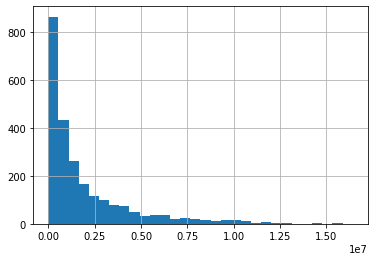

In [19]:
ex_data['salary'].hist(bins=30)

In [20]:
ex_data['logsalary']=np.log(ex_data['salary'])
ex_data['logG']=np.log(ex_data['career_G'])

<ipython-input-20-0049946cf78f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data['logsalary']=np.log(ex_data['salary'])
<ipython-input-20-0049946cf78f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data['logG']=np.log(ex_data['career_G'])


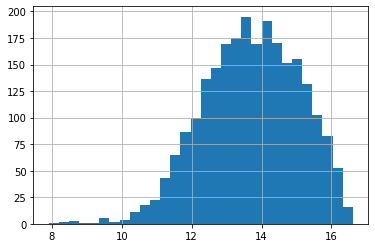

In [21]:
ex_data['logsalary'].hist(bins=30)

In [22]:
ex_data.isnull().sum()

career_PTS    0
career_G      0
salary        0
logsalary     0
logG          0
dtype: int64

Good to go!

In [23]:
Xe=ex_data[['career_PTS','logG']]
ye=ex_data['logsalary']

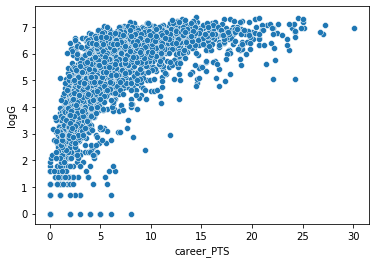

In [24]:
sns.scatterplot(x='career_PTS',y='logG',data=ex_data)

Each dot has a salary -- think of as a height above the point or use color.

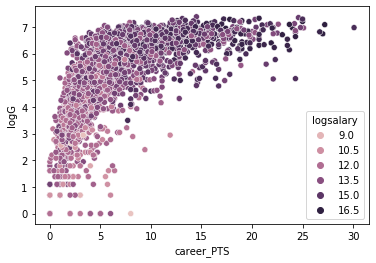

In [25]:
sns.scatterplot(x='career_PTS',y='logG',data=ex_data,hue='logsalary')

Idea of a decision tree: Divide the predictor space up into non-overlapping regions $R_1,\ldots, R_n$.

Then predict the same value for all points in a given region $R_i$: use mean of all values in $R_i$: average log salary, eg.

This is complicated in that there are too many possible regions. 

* Use rectangles
* Pick a predictor $X_j$. For each value $s$, compute $RSS$ using ($X_j < s$) and ($X_j > s$) 
* Pick the predictor and cutpoint having the lowest $RSS$.
* Now repeat within previously defined regions.

The rectangular regions are called *terminal nodes* or *leaves*.

Example

In [26]:
eregr = DecisionTreeRegressor(max_depth=2).fit(Xe,ye)

In [27]:
from sklearn.tree import export_text

In [28]:
r = export_text(eregr,feature_names=list(Xe.columns))
print(r)

|--- logG <= 4.90
|   |--- logG <= 3.24
|   |   |--- value: [12.09]
|   |--- logG >  3.24
|   |   |--- value: [12.98]
|--- logG >  4.90
|   |--- career_PTS <= 9.05
|   |   |--- value: [13.90]
|   |--- career_PTS >  9.05
|   |   |--- value: [14.84]



In [29]:
eregr.get_depth()

2

In [30]:
eregr3 = DecisionTreeRegressor(max_depth=3).fit(Xe,ye)
r3=export_text(eregr3,feature_names=list(Xe.columns))
print(r3)

|--- logG <= 4.90
|   |--- logG <= 3.24
|   |   |--- logG <= 1.50
|   |   |   |--- value: [11.55]
|   |   |--- logG >  1.50
|   |   |   |--- value: [12.25]
|   |--- logG >  3.24
|   |   |--- career_PTS <= 7.40
|   |   |   |--- value: [12.92]
|   |   |--- career_PTS >  7.40
|   |   |   |--- value: [13.99]
|--- logG >  4.90
|   |--- career_PTS <= 9.05
|   |   |--- logG <= 5.80
|   |   |   |--- value: [13.55]
|   |   |--- logG >  5.80
|   |   |   |--- value: [14.20]
|   |--- career_PTS >  9.05
|   |   |--- career_PTS <= 14.35
|   |   |   |--- value: [14.67]
|   |   |--- career_PTS >  14.35
|   |   |   |--- value: [15.16]



Visual aid on the depth 2 tree:

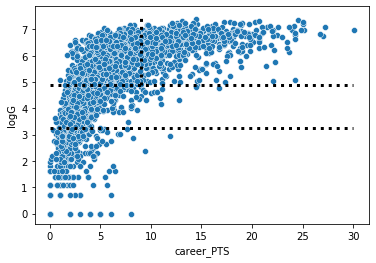

In [31]:
sns.scatterplot(x='career_PTS',y='logG',data=ex_data)
plt.hlines(y=4.9, xmin=0, xmax=30, colors='black', ls=':', lw=3)
plt.hlines(y=3.24, xmin=0, xmax=30, colors='black', ls=':', lw=3)
plt.vlines(x=9.05, ymin=4.9, ymax=7.5, colors='black', ls=':', lw=3)

Let's work on the full data set

In [32]:
players['logsalary']=np.log(players['salary'])
players['logG'] =np.log(players['career_G'])

In [33]:
players.columns

Index(['_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'player_id', 'salary',
       'logsalary', 'logG'],
      dtype='object')

Let's use columns that seem relevant and drop some that don't.

In [34]:
pdf=players[['career_AST', 'career_FG%','career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS','career_TRB', 'career_WS', 'career_eFG%',
       'logsalary', 'logG']]

Some of these features need to be converted to numerical.

In [35]:
pdf.dtypes

career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
logsalary      float64
logG           float64
dtype: object

In [36]:
pdf['career_FG%']=pd.to_numeric(pdf['career_FG%'],errors='coerce')
pdf['career_FG3%']=pd.to_numeric(pdf['career_FG3%'],errors='coerce')
pdf['career_FT%']=pd.to_numeric(pdf['career_FT%'],errors='coerce')
pdf['career_PER']=pd.to_numeric(pdf['career_PER'],errors='coerce')
pdf['career_TRB']=pd.to_numeric(pdf['career_TRB'],errors='coerce')
pdf['career_WS']=pd.to_numeric(pdf['career_WS'],errors='coerce')
pdf['career_eFG%']=pd.to_numeric(pdf['career_eFG%'],errors='coerce')

<ipython-input-36-d8f5dc6bedca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['career_FG%']=pd.to_numeric(pdf['career_FG%'],errors='coerce')
<ipython-input-36-d8f5dc6bedca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['career_FG3%']=pd.to_numeric(pdf['career_FG3%'],errors='coerce')
<ipython-input-36-d8f5dc6bedca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [37]:
pdf.isnull().sum()

career_AST       0
career_FG%       9
career_FG3%    219
career_FT%      69
career_G         0
career_PER       2
career_PTS       0
career_TRB       0
career_WS        0
career_eFG%      9
logsalary        0
logG             0
dtype: int64

As before, drop nans.

In [38]:
pdf=pdf.dropna()

In [39]:
X=pdf.drop('logsalary',axis=1)
y=pdf['logsalary']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

In [41]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_5 = DecisionTreeRegressor(max_depth=5)
full_tree = DecisionTreeRegressor()
regr_1.fit(X_train, y_train)
regr_5.fit(X_train, y_train)
full_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
full_tree.get_depth()

22

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(full_tree.predict(X_train), y_train)

0.0

In [45]:
mean_squared_error(regr_5.predict(X_train), y_train)

0.7318517992925049

In [46]:
mean_squared_error(regr_1.predict(X_train), y_train)

1.0382856738369686

In [47]:
print("full",mean_squared_error(full_tree.predict(X_test), y_test),":","depth5",mean_squared_error(regr_5.predict(X_test), y_test),":","depth2",mean_squared_error(regr_1.predict(X_test), y_test))

full 1.4121045621133965 : depth5 0.8638189588881553 : depth2 0.9628871344705724


Good example of overfitting!!

Deep trees are prone to overfitting.

We can also use $R^2$ on test set as metric

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(full_tree.predict(X_test),y_test)

0.1585081058787675

In [50]:
r2_score(regr_5.predict(X_test),y_test)

0.17792705017844235

We can also draw thhe decision tree but this gets messy quickly:

[Text(167.4, 181.2, 'career_WS <= 6.55\nmse = 1.756\nsamples = 1512\nvalue = 13.838'),
 Text(83.7, 108.72, 'career_G <= 26.5\nmse = 1.196\nsamples = 694\nvalue = 13.024'),
 Text(41.85, 36.23999999999998, 'mse = 1.244\nsamples = 116\nvalue = 12.111'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.986\nsamples = 578\nvalue = 13.207'),
 Text(251.10000000000002, 108.72, 'career_PER <= 16.65\nmse = 1.192\nsamples = 818\nvalue = 14.529'),
 Text(209.25, 36.23999999999998, 'mse = 1.07\nsamples = 646\nvalue = 14.332'),
 Text(292.95, 36.23999999999998, 'mse = 0.954\nsamples = 172\nvalue = 15.268')]

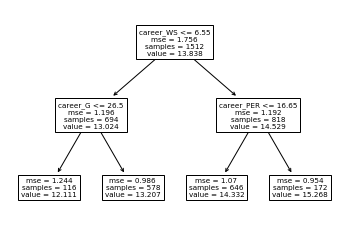

In [51]:
tree.plot_tree(regr_1,feature_names=list(X.columns))

In [52]:
print("left terminal node",np.exp(12.111),":","right terminal node",np.exp(15.268))

left terminal node 181861.37499775478 : right terminal node 4273740.512560558


# feature importances

Feature importances help us understand which variables are responsible for the largest reductions in $RSS$.  

In [53]:
regr_5.feature_importances_

array([0.00000000e+00, 2.63304833e-02, 9.88293952e-02, 1.12422910e-02,
       7.48862537e-02, 7.69889861e-02, 7.70047066e-02, 7.23274817e-02,
       5.53009329e-01, 9.37962616e-03, 1.44746402e-06])

(-1, 11)

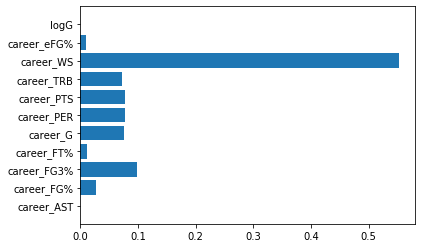

In [54]:
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),regr_5.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)

How to control for overfitting? One option is to set max depth or stop adding branches if $RSS$ reduction isn't large enough. However, this can miss good cuts coming later on.

Preferred: Build a deep tree and prune it back.

One method to do this is called *cost complexity pruning*. It borrows an idea from Ridge Regression.

Given a deep tree $T$, and parameter $\alpha$ find a subtree that minimizes:
$$
\sum_{m=1}^{|T|}\sum_{x_i\in R_m}(y_i-\hat{y}_{R_m})^2 +\alpha|T|
$$
where $|T|$ is the number of terminal nodes in teh tree.

So, add a penalty for complex (deep) trees.

Then we can use cross validation to select the optimal $\alpha$.

In [55]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [56]:
ccp_alphas

array([0.00000000e+00, 4.62059550e-12, 3.48664636e-11, ...,
       7.67129990e-02, 7.88670246e-02, 5.62379702e-01])

Text(0.5, 1.0, 'Total MSE vs effective alpha for training set')

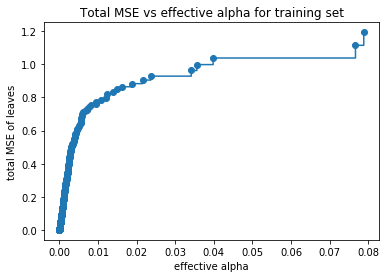

In [57]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total MSE of leaves")
ax.set_title("Total MSE vs effective alpha for training set")

In [58]:
len(ccp_alphas)

1417

In [59]:
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    regs.append(reg)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      regs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.562379701662179


In [60]:
regs = regs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [61]:
len(regs)

1416

In [66]:
ccp_alphas[0:3]

array([0.00000000e+00, 4.62059550e-12, 3.48664636e-11])

In [67]:
len(ccp_alphas)

1416

In [68]:
node_counts = [reg.tree_.node_count for reg in regs]

In [69]:
len(node_counts)

1416

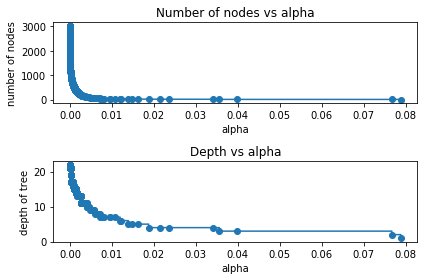

In [70]:
node_counts = [reg.tree_.node_count for reg in regs]
depth = [reg.tree_.max_depth for reg in regs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

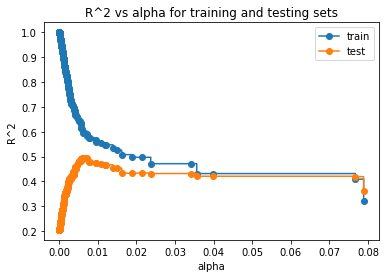

In [71]:
train_scores = [reg.score(X_train, y_train) for reg in regs]
test_scores = [reg.score(X_test, y_test) for reg in regs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("R^2")
ax.set_title("R^2 vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

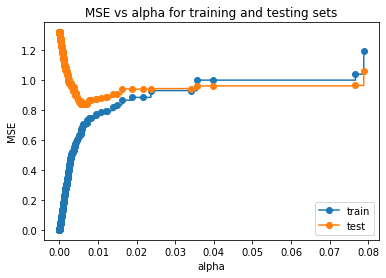

In [72]:
train_scores = [mean_squared_error(reg.predict(X_train), y_train) for reg in regs]
test_scores = [mean_squared_error(reg.predict(X_test),y_test) for reg in regs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [73]:
ccp_alphas[0:10]

array([0.00000000e+00, 4.62059550e-12, 3.48664636e-11, 6.39214208e-11,
       6.80439409e-11, 8.65987493e-11, 3.60857794e-10, 3.73271239e-10,
       4.72637482e-10, 4.94181815e-10])

This takes a while-- be careful!

In [74]:
cvres=[]
for a in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha= a)
    cvreg = cross_validate(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cvres.append(cvreg['test_score'].mean())

In [75]:
np.argmax(cvres)

1402

In [76]:
regO = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alphas[1402]).fit(X_train,y_train)

In [79]:
ccp_alphas[1402]

0.010770454182036628

In [80]:
regO.get_depth()

7

In [81]:
regO.score(X_test,y_test)

0.47120177155647147

In [82]:
full_tree.score(X_test,y_test)

0.147722212133779

In [83]:
mean_squared_error(regO.predict(X_test),y_test)

0.8761443762274823

In [84]:
mean_squared_error(full_tree.predict(X_test),y_test)

1.4121045621133965

#### Decision Tree Classifiers

Very similar! The only real difference is that we can't use $RSS$ or $MSE$ to determine the cut points. 

Essentially, we need a definition of error in a rectangular region. We will assign all points in $R_i$ to the most common class in $R_i$. So, it would seem natural to use the fraction of observations *not* in that most common class. 

$$
1-\max_{k}(\hat{p}_{mk})
$$

This turns out to be not quite sensitive enough to decide cuts. Rather we use the Gini-index:

$$
G=\sum_{k} \hat{p}_{mk}(1-\hat{p}_{mk})
$$

G is small when all classes are near $0$ or $1$.

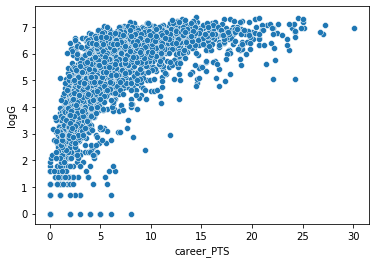

In [85]:
# Plot the results
sns.scatterplot(x='career_PTS',y='logG',data=ex_data)
plt.show()

In [86]:
np.argmax(cvres)

1402

In [87]:
optalp=ccp_alphas[1393]
optalp

0.005828859350107134

In [88]:
regO = DecisionTreeRegressor(random_state=0, ccp_alpha=optalp).fit(X_train,y_train)

In [89]:
regO.get_depth()

9

In [90]:
print("The pruned tree has R-squared score {} while the full tree has R-squared {}".format(regO.score(X_test,y_test),full_tree.score(X_test,y_test)))

The pruned tree has R-squared score 0.4942052386385605 while the full tree has R-squared 0.147722212133779


In [91]:
print("The pruned tree has R-squared score {} while the full tree has R-squared {}".format(mean_squared_error(regO.predict(X_test),y_test),mean_squared_error(full_tree.predict(X_test),y_test)))

The pruned tree has R-squared score 0.8380308629182018 while the full tree has R-squared 1.4121045621133965


Text(0, 0.5, 'predicted log-salary')

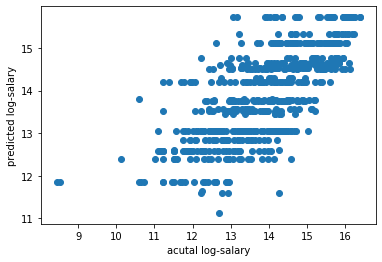

In [92]:
plt.scatter(y_test,regO.predict(X_test))
plt.xlabel("acutal log-salary")
plt.ylabel("predicted log-salary")

Are we doing better than plain old linear regression?

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
ols=LinearRegression().fit(X_test,y_test)

In [95]:
mean_squared_error(ols.predict(X_test),y_test)

0.7503992258578253

In [96]:
ols.score(X_test,y_test)

0.547095442228821

Still not better than OLS regression!

In [97]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [98]:
alphas = 10**np.linspace(5,-3,100)

In [99]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.0021049041445120177

In [100]:
ridgemod = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridgemod.fit(X_train, y_train)

Ridge(alpha=0.0021049041445120177, normalize=True)

In [101]:
y_pred=ridgemod.predict(X_test)
mean_squared_error(y_test, y_pred)

0.7916803261452642

In [102]:
ridgemod.score(X_test,y_test)

0.522180173361616

So OLS outperforms Ridge here.

# Bagging

Idea: Create many decision trees (grown deep: no pruning). We know they will overfit-- i.e, will have high variance.

Reduce variance by averaging! People's heights will have much more variation then average heights of groups of 10 people.

If a random variable $X$ has variance $\sigma^2$ then the distribution of the sample mean $\overline{X}$ has variance $\frac{\sigma^2}{\sqrt{n}}$ where $n$ is sample size.

Problem: there's only one training set-- so how do we fit different trees to average? 

The bootstrap. Sample the training observations with replacement and fit a decision tree on the resampled data. Each tree only looks at some of the observations.

If the bootstrapped samples are labeled:
$$
1,2,3,\ldots, B,
$$
and the corresponding (deep) trees are 
$$
f^*_1,f^*_2,\ldots,f^*_B,
$$
then for a test observation $x$ we predict:
$$
f^{\text{avg}}(x)=\frac{1}{B}\sum_{i=1}^Bf^*_i(x)
$$
and where the * reminds us that each tree is fit on a bootstrap sample of the original training data set.

In [103]:
from sklearn.ensemble import BaggingRegressor

In [104]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,
                        oob_score=True,
                        random_state=0).fit(X_train, y_train)

In [105]:
print("R^2 is {}".format(regr.score(X_test,y_test)),":",":", "MSE is {}".format(mean_squared_error(regr.predict(X_test),y_test)))

R^2 is 0.5792437376123709 : : MSE is 0.6971340167656865


Improvement! OLS $R^2$ was 0.745.

The bootstrap gives us a way to estimate test-set error without the actual test set. Since the bootstrap samples the training data for each tree, some observations won't be used in the building of the $i$-th tree. 

Thhese observations are called *out-of-bag* observations (OOB) and we can use them as de facto test observations for that tree. In practice, for an observation $x$ we can average the prediction over all trees that leave $x$ OOB. 

Warning: We should still use a test set. But, this could be useful, say, to determine the optimal number of trees to use.

In [106]:
regr.oob_score_

0.5730093794202271

In [107]:
num_trees=np.linspace(50,500,10)

In [108]:
oob_res=[]
for trs in num_trees:
    res = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=np.int(trs),oob_score=True,random_state=0).fit(X_train, y_train)
    oob_res.append(res.oob_score_)

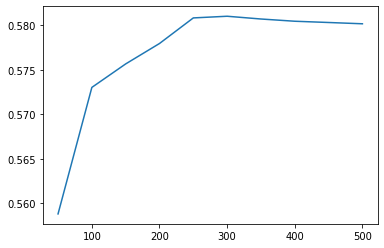

In [112]:
plt.plot(num_trees,oob_res)

Looks like we peak around 400 trees (though only very slightly better than 100 trees).

In [113]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        n_estimators=400,
                        random_state=0).fit(X_train, y_train)

In [114]:
regr.score(X_test,y_test)

0.583215815860534

Test $R^2$ only slightly lower than the OOB score above.

# Random Forests:

Another approach to aggregating trees built on bootstrap samples of the data (like bagging), but with a small tweak. 

Each time we make a split in a tree, we do so using a random sample of the available features. Usually we choose $\approx \sqrt{p}$ features.

Why? Decorrelate the trees and allow weaker signals to get through. The same featires won't dominate all the trees.

Not guaranteed to improve over nbagging but can be a big help if we have many correlated features.

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf = RandomForestRegressor(n_estimators=400,max_features='sqrt',
                           random_state=0).fit(X_train,y_train)

In [117]:
rf.score(X_test,y_test)

0.5808183621436971

Very similar to straight bagging here (more examples in the sandbox). Might want to look at feature importances though bagging (and RFs) are not easily interpreted (like a single tree is).

(-1, 11)

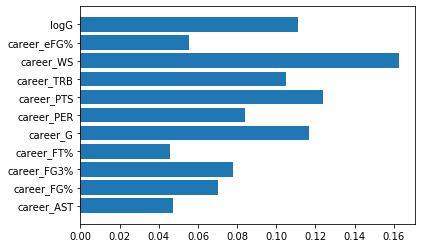

In [118]:
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rf.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)

# Boosting

Again -- use multiple trees to attack the problem. BUT, trees are grown sequentially and are kept small (prevent overfitting).

Start with a single tree $\hat{f_1}$. 

Then, build a new tree to improve on the prediction of $\hat{f_1}$ by fitting the residuals
$$
y_i-\hat{f_1}(x_i).
$$
We get a new model $\hat{f_2}$ which we add to the old model:
$$
\hat{f_1}+\lambda \hat{f_2}
$$

$\lambda$ is a parameter called the learning rate. It's a small-ish number (0.1, 0.01, 0.001) that slows down the learning process allowing more trees to attack the residuals.

Each small tree is a weak learner but they combine into a strong learner.

$$
\hat{f}(x) = \sum_{i=1}^B\lambda \hat{f_i}(x)
$$

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
breg = GradientBoostingRegressor(random_state=0,learning_rate=0.1,n_estimators=500,max_depth=2).fit(X_train,y_train)

In [121]:
breg.score(X_test,y_test)

0.5601315311679087

Tiny improvent over bagging and random forests...

One challenge in building a boosting model is that we have several parameters to choose. 
1. The number of trees.
2. The max depth of each tree.
3. The learning rate.

```sklearn``` has a function to help cross validate over a grid of parameter values. WARNING: It can be slow!!!

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameters = {'learning_rate':[0.1,0.01], 'n_estimators':[300,400,500],'max_depth':[2,3,4,5]}

In [124]:
bmod = GradientBoostingRegressor(random_state=0)

In [125]:
boost_regr = GridSearchCV(bmod, parameters)
boost_regr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [300, 400, 500]})

Lot's of info in here-- we can pull it all into a data frame...

In [126]:
df=pd.DataFrame.from_dict(boost_regr.cv_results_)

... and pull out the parameter values corresponding to the best CV score. 

In [127]:
df[df['mean_test_score']==df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,1.621032,0.035332,0.005266,0.000111,0.01,4,500,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.544431,0.60046,0.663753,0.538545,0.518972,0.573232,0.052749,1


In [128]:
best_breg = GradientBoostingRegressor(random_state=0,learning_rate=0.01,n_estimators=400,max_depth=4).fit(X_train,y_train)

In [129]:
np.round(best_breg.score(X_test,y_test),2)

0.58

# PCA Approach and Feature Engineering

In [130]:
sal_avg=sal.groupby('player_id',as_index=False).mean()[['player_id','salary','season_end']]
sal_avg.head()

,player_id,salary,season_end
0,abdelal01,5.688000e+05,1993.000000
1,abdulka01,2.140000e+06,1987.000000
2,abdulma02,2.205500e+06,1995.222222
3,abdulta01,3.798280e+06,2002.500000
4,abdursh01,8.715091e+06,2003.909091


Merge stats and salaries.

In [131]:
plsal=pl.merge(sal_avg,how='left',left_on='_id',right_on='player_id')
plsal.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_year,height,highSchool,name,position,shoots,weight,player_id,salary,season_end
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,abdelal01,568800.0,1993.000000
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb,NaN,NaN,NaN
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb,abdulka01,2140000.0,1987.000000
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb,abdulma02,2205500.0,1995.222222
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb,abdulta01,3798280.0,2002.500000


In [132]:
plsal.shape

(4685, 27)

In [133]:
plsal.isna().sum()

_id               0
birthDate        28
birthPlace      500
career_AST        0
career_FG%        0
career_FG3%    1128
career_FT%        0
career_G          0
career_PER        0
career_PTS        0
career_TRB        0
career_WS         0
career_eFG%    1128
college         313
draft_pick     1316
draft_round    1178
draft_team     1178
draft_year     1379
height            0
highSchool      660
name              0
position          0
shoots            1
weight            5
player_id      2277
salary         2277
season_end     2277
dtype: int64

Drop missing salaries.

In [134]:
plsal=plsal[plsal['salary'].notnull()]

In [135]:
plsal.shape

(2408, 27)

In [136]:
plsal.dtypes

_id             object
birthDate       object
birthPlace      object
career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
college         object
draft_pick      object
draft_round     object
draft_team      object
draft_year      object
height          object
highSchool      object
name            object
position        object
shoots          object
weight          object
player_id       object
salary         float64
season_end     float64
dtype: object

Lots of columns are encoded as object types rather than numerical which is an issue for ```sklearn```. We'll need to fix. Also, Height and weight have issues...

In [137]:
plsal[['height','weight']].head()

,height,weight
0,6-10,240lb
2,7-2,225lb
3,6-1,162lb
4,6-6,223lb
5,6-9,225lb


We need to make these numbers...

In [138]:
def num_ht(row):
    return np.int(row['height'].split("-")[0])*12+np.int(row['height'].split("-")[1])
def num_wt(row):
    return np.int(row['weight'].split("lb")[0])

In [139]:
plsal['num_ht']=plsal.apply(num_ht,axis=1)
plsal['num_wt']=plsal.apply(num_wt,axis=1)

In [140]:
plsal[['num_ht','num_wt']].head()

,num_ht,num_wt
0,82,240
2,86,225
3,73,162
4,78,223
5,81,225


Let's think about which columns we want to predict salary. Probably not high school, birthdate, etc.

In [141]:
plsal.columns

Index(['_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'player_id', 'salary',
       'season_end', 'num_ht', 'num_wt'],
      dtype='object')

In [142]:
cols=['career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%',
       'name','player_id', 'salary',
       'season_end', 'num_ht','num_wt']

Note: Position might be meaningful to salary. For example, are centers more valuable because there are fewer? But if we want to do PCA we need all numeric features so we have to drop it or think of a way to encode it. Drop for now.

In [143]:
df=plsal[cols]

In [144]:
df.dtypes

career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
name            object
player_id       object
salary         float64
season_end     float64
num_ht           int64
num_wt           int64
dtype: object

Force to numeric dtype. Tgis can cause errors which will become NaN.

In [145]:
df[['career_FG%', 'career_FG3%', 'career_FT%','career_PER', 'career_TRB', 'career_WS', 'career_eFG%',]]=df[['career_FG%', 'career_FG3%', 'career_FT%','career_PER', 'career_TRB', 'career_WS', 'career_eFG%',]].apply(pd.to_numeric, errors='coerce')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [146]:
df.dtypes

career_AST     float64
career_FG%     float64
career_FG3%    float64
career_FT%     float64
career_G         int64
career_PER     float64
career_PTS     float64
career_TRB     float64
career_WS      float64
career_eFG%    float64
name            object
player_id       object
salary         float64
season_end     float64
num_ht           int64
num_wt           int64
dtype: object

In [147]:
df.isna().sum()

career_AST       0
career_FG%       9
career_FG3%    219
career_FT%      69
career_G         0
career_PER       2
career_PTS       0
career_TRB       0
career_WS        0
career_eFG%      9
name             0
player_id        0
salary           0
season_end       0
num_ht           0
num_wt           0
dtype: int64

In [148]:
df[df['career_FG3%'].isna()].head()

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,player_id,salary,season_end,num_ht,num_wt
38,0.2,31.4,NaN,70.0,26,10.3,1.5,2.3,0.0,31.4,Solomon Alabi,alabiso01,8.000000e+05,2011.500000,85,251
42,0.5,52.7,NaN,73.8,339,16.6,3.1,3.3,9.6,52.7,Cole Aldrich,aldrico01,3.411952e+06,2014.571429,83,250
45,0.0,50.0,NaN,NaN,8,11.6,1.3,0.8,0.0,50.0,Cliff Alexander,alexacl01,2.882710e+05,2016.500000,80,245
48,0.2,57.1,NaN,33.3,11,8.6,1.7,1.4,0.0,57.1,Gary Alexander,alexaga01,1.500000e+05,1995.000000,79,240
105,0.0,0.0,NaN,NaN,6,15.5,0.0,0.7,0.0,0.0,Martynas Andriuskevicius,andrima01,5.314855e+05,2006.500000,86,240


Most of these are players who didn't attempt any 3P shots. We could (should?) have fixed this but it seems reasonable to change 3P% this to 0 for these players.

In [149]:
df['career_FG3%'].fillna(0,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [150]:
df.isna().sum()

career_AST      0
career_FG%      9
career_FG3%     0
career_FT%     69
career_G        0
career_PER      2
career_PTS      0
career_TRB      0
career_WS       0
career_eFG%     9
name            0
player_id       0
salary          0
season_end      0
num_ht          0
num_wt          0
dtype: int64

What about players with a career FT% that isn't defined (so they probably had 0 FTA in their career). 

In [151]:
df[df['career_FT%'].isna()].head()

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,player_id,salary,season_end,num_ht,num_wt
36,0.3,50.0,50.0,NaN,3,15.3,1.7,0.3,0.0,62.5,Josh Akognon,akognjo01,788872.0,2014.0,71,185
45,0.0,50.0,0.0,NaN,8,11.6,1.3,0.8,0.0,50.0,Cliff Alexander,alexacl01,288271.0,2016.5,80,245
105,0.0,0.0,0.0,NaN,6,15.5,0.0,0.7,0.0,0.0,Martynas Andriuskevicius,andrima01,531485.5,2006.5,86,240
112,0.0,75.0,0.0,NaN,2,32.9,3.0,0.5,0.0,75.0,Thanasis Antetokounmpo,antetth01,105888.0,2016.0,79,205
165,0.2,26.7,22.2,NaN,14,3.7,1.6,1.2,0.0,36.7,Chris Babb,babbch01,48028.0,2015.0,77,225


These players played very few games in general. This suggests another issue with the data -- FG percentages and other stats like PER for small sample size players are highly unreliable. Probably more cleaning is in order to resolve this -- but we'll just drop them for now.

In [152]:
df.dropna(inplace=True)

<ipython-input-152-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [153]:
df.reset_index(inplace=True,drop=True)
df.head()

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,player_id,salary,season_end,num_ht,num_wt
0,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Alaa Abdelnaby,abdelal01,5.688000e+05,1993.000000,82,240
1,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,Kareem Abdul-Jabbar,abdulka01,2.140000e+06,1987.000000,86,225
2,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Mahmoud Abdul-Rauf,abdulma02,2.205500e+06,1995.222222,73,162
3,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,Tariq Abdul-Wahad,abdulta01,3.798280e+06,2002.500000,78,223
4,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,Shareef Abdur-Rahim,abdursh01,8.715091e+06,2003.909091,81,225


In [154]:
df.shape

(2339, 16)

Ready to go! Let's separate out numerical and non-numerical colummns so we can do PCA.

In [155]:
X=df.drop(['name','player_id','salary'],axis=1)
names=df[['player_id','name']]
y=df['salary']

In [156]:
X.shape

(2339, 13)

The features have very different scales.

In [157]:
df[df['career_G']>100][['career_G','career_PTS','career_FG%','career_TRB']].head()

,career_G,career_PTS,career_FG%,career_TRB
0,256,5.7,50.2,3.3
1,1560,24.6,55.9,11.2
2,586,14.6,44.2,1.9
3,236,7.8,41.7,3.3
4,830,18.1,47.2,7.5


In [158]:
df.mean()

career_AST     1.591407e+00
career_FG%     4.391347e+01
career_FG3%    2.350073e+01
career_FT%     7.145237e+01
career_G       3.783198e+02
career_PER     1.227708e+01
career_PTS     7.168320e+00
career_TRB     3.157845e+00
career_WS      1.968935e+01
career_eFG%    4.679637e+01
salary         2.015496e+06
season_end     2.003440e+03
num_ht         7.899701e+01
num_wt         2.171518e+02
dtype: float64

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Initiate the scaler which will mean center (subtract off the column mean from each feature value) and standardize (divide by column st dev). 

Then, transform the data into the new, scaled values. Now, each value can be interpreted as "number of standard deviations from the mean".  

In [160]:
scaler = StandardScaler().fit(X)
X_scaled=scaler.transform(X)

Now, X_scaled is a numpy array. Good for ```sklearn```, less good for human reading. Here's the first row...

In [161]:
X_scaled[0]

array([-0.85723617,  0.88168074, -1.5308173 , -0.1092433 , -0.35926154,
        0.16103399, -0.30086392,  0.06661973, -0.48643257,  0.489595  ,
       -1.03870696,  0.82224114,  0.82790897])

In [162]:
print(X.shape,X_scaled.shape)

(2339, 13) (2339, 13)


In [163]:
X.columns

Index(['career_AST', 'career_FG%', 'career_FG3%', 'career_FT%', 'career_G',
       'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'career_eFG%',
       'season_end', 'num_ht', 'num_wt'],
      dtype='object')

Now, the plan is to first do PCA, then run regression (simple OLS) using the transformed data (coordinates in terms of the PCs) as features. Question: How many PCs should we use? How does the model perform on new data?

These are familiar questions. We can cross validate to answer the first, but ultimately need a test set to see how our final model does on new data.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=5)

In [165]:
from sklearn.decomposition import PCA

In [166]:
X_train.shape

(1637, 13)

There are 13 features so we'll use < 13 principal components.

First find the principal components. This is unsupervised -- just looks at the features and finds the directions that explain the most vaiance (subject to orthogonality). 

In [167]:
pca = PCA(13).fit(X_train)

Next, transform the data -- that means project the data onto the principal components, and get new cooridinates (in terms of the PCs).

In [168]:
pca_tr = pca.transform(X_train)

Note: If you didn't care about the actual principal components, and wanted to go directly to the transformed (projected) data, you can use: ```PCA(13).fit_transform(X_train)```

TO see how much of the variance in teh original data we have in the PCs:

In [169]:
pca.explained_variance_ratio_

array([0.35891947, 0.24138057, 0.10788447, 0.08705219, 0.05511659,
       0.04654338, 0.02932237, 0.02172946, 0.01445815, 0.01363934,
       0.01186346, 0.00876702, 0.00332353])

so for the first 3:

In [170]:
pca.explained_variance_ratio_[0:3].sum()

0.7081845062562899

The projected training data is here:

In [171]:
pca_tr.shape

(1637, 13)

In [172]:
from sklearn.model_selection import cross_validate

Cross validate the number of PCs in a linear regression model. I'm using $r^2$ on the test-fold as the scoring metric. 

In [173]:
cvres=[]
num_pcs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for a in num_pcs:
    reg = LinearRegression()
    cvreg = cross_validate(reg, pca_tr[:,0:a], y_train, cv=5, scoring='r2')
    cvres.append(cvreg['test_score'].mean())

In [174]:
cvres

[0.37761895153891356,
 0.37788161689771055,
 0.38067009917037675,
 0.5819843531527811,
 0.6291571093278798,
 0.6330725324599682,
 0.6316018940600228,
 0.6322299573007808,
 0.635961402308906,
 0.6366623350004404,
 0.6396634498673729,
 0.6378627858370615,
 0.637713088114187,
 0.637713088114187]

In [175]:
np.argmax(cvres)

10

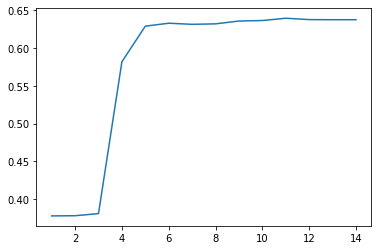

In [176]:
plt.plot(range(1,15),cvres)

From this, while the $r^2$ technically peaks with 11 principal components, it definitely seems like there's very little gained after 5 or 6 principal components. 

So, one could build a regression model on the full training set using the first 5 or 6 PCs. We might want to explore those PCs and see if we learn anything. 

In [177]:
for col,val in zip(X.columns,pca.components_[0]):
    print(col,":",val)

career_AST : 0.27853169534582756
career_FG% : 0.27919284870435457
career_FG3% : 0.11503059022781437
career_FT% : 0.15680734577084332
career_G : 0.3875339714641801
career_PER : 0.38149174289602633
career_PTS : 0.40560735094102485
career_TRB : 0.33690579730294384
career_WS : 0.3823367248860594
career_eFG% : 0.2929486593191292
season_end : -0.029054792990176177
num_ht : 0.0004745362880638204
num_wt : -0.008050145342217818


In [178]:
for col,val in zip(X.columns,pca.components_[1]):
    print(col,":",val)

career_AST : 0.32772920648345477
career_FG% : -0.28938440160339896
career_FG3% : 0.3312933994417727
career_FT% : 0.2980346298632464
career_G : 0.030992980415866914
career_PER : -0.04704053748318521
career_PTS : 0.08175996142584496
career_TRB : -0.25332161073223225
career_WS : 0.015230264996972859
career_eFG% : -0.16154107422598052
season_end : -0.018244765447846957
num_ht : -0.5126101875227531
num_wt : -0.4968005797143811


PCR helps address overfitting by reducing the number of features (building a less flexible model) and multicolinearity (the principal components are orthogonal so uncorrelated). In this way it is a competitor to Ridge or Lasso regression (similar aims). The downside is interpretability of the model. 